In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [28]:
Conglomerado = pd.read_excel("RetoConglomerados.xlsx")

In [29]:
Conglomerado = Conglomerado.iloc[ : , [22,18,19,20,21,13,15,16]]
Conglomerado.head()

,Precio_m2,m2_construido,Baños,Recamaras,Lugares_estac,Gimnasio,Alberca,Terraza
0,6500.0,150.0,2.0,3,2,Si,No,Si
1,1200.0,51.0,1.0,2,1,No,No,No
2,17500.0,305.0,3.0,3,3,Si,No,Si
3,1046.4,42.0,1.0,2,1,No,No,No
4,1195.0,50.0,1.0,2,1,No,No,No


In [30]:


Conglomerado["Baños"]=Conglomerado["Baños"].replace("Si",1)
Conglomerado["Baños"]=Conglomerado["Baños"].replace("No",0)

Conglomerado["Recamaras"]=Conglomerado["Recamaras"].replace("Si",1)
Conglomerado["Recamaras"]=Conglomerado["Recamaras"].replace("No",0)

Conglomerado["Lugares_estac"]=Conglomerado["Lugares_estac"].replace("Si",1)
Conglomerado["Lugares_estac"]=Conglomerado["Lugares_estac"].replace("No",0)



Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("Si",1)
Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("Si ",1)
Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("No",0)
Conglomerado["Gimnasio"]=Conglomerado["Gimnasio"].replace("No ",0)


Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("Si",1)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("si ",1)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("Si ",1)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("No",0)
Conglomerado["Alberca"]=Conglomerado["Alberca"].replace("No ",0)

Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("Si",1)
Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("Si ",1)
Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("No",0)
Conglomerado["Terraza"]=Conglomerado["Terraza"].replace("No ",0)


In [31]:
Conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precio_m2      658 non-null    float64
 1   m2_construido  658 non-null    float64
 2   Baños          658 non-null    float64
 3   Recamaras      658 non-null    int64  
 4   Lugares_estac  658 non-null    int64  
 5   Gimnasio       658 non-null    int64  
 6   Alberca        658 non-null    int64  
 7   Terraza        658 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 41.3 KB


In [32]:
Conglomerado.describe()

,Precio_m2,m2_construido,Baños,Recamaras,Lugares_estac,Gimnasio,Alberca,Terraza
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,4283.779521,103.319529,1.684650,2.317629,1.408815,0.279635,0.170213,0.483283
std,6969.142100,75.966671,0.838854,0.576843,0.821170,0.449161,0.376106,0.500101
min,1.250000,34.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,861.492750,58.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1934.040000,72.500000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,5541.850000,120.000000,2.000000,3.000000,2.000000,1.000000,0.000000,1.000000
max,128524.000000,500.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000


In [33]:
conglomerados_norm = (Conglomerado-Conglomerado.min())/(Conglomerado.max()-Conglomerado.min())
conglomerados_norm

,Precio_m2,m2_construido,Baños,Recamaras,Lugares_estac,Gimnasio,Alberca,Terraza
0,0.050565,0.248927,0.25,0.50,0.4,1.0,0.0,1.0
1,0.009327,0.036481,0.00,0.25,0.2,0.0,0.0,0.0
2,0.136153,0.581545,0.50,0.50,0.6,1.0,0.0,1.0
3,0.008132,0.017167,0.00,0.25,0.2,0.0,0.0,0.0
4,0.009288,0.034335,0.00,0.25,0.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
653,0.045055,0.139485,0.25,0.25,0.2,1.0,0.0,1.0
654,0.017108,0.064378,0.00,0.25,0.2,0.0,0.0,0.0
655,0.008506,0.120172,0.00,0.50,0.2,1.0,0.0,1.0
656,0.005048,0.034335,0.00,0.25,0.2,0.0,0.0,0.0


In [34]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,max_iter = 300)
    kmeans.fit(conglomerados_norm)
    wcss.append(kmeans.inertia_)
    

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Casillas\AppData\Local\Programs\Python\

<function matplotlib.pyplot.show(close=None, block=None)>

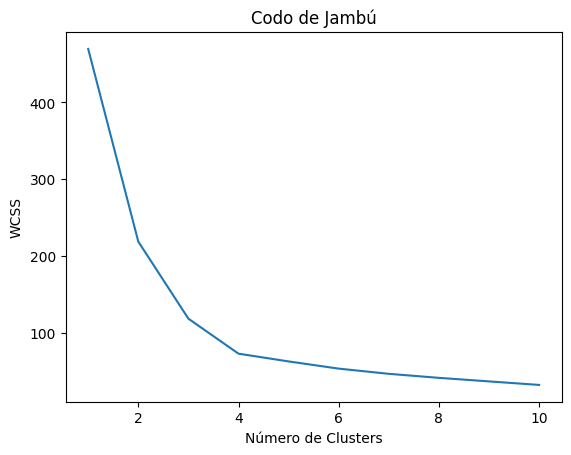

In [35]:
plt.plot(range(1, 11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show

In [36]:
clustering = KMeans(n_clusters = 4, max_iter=300)
clustering.fit(conglomerados_norm)

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [37]:
Conglomerado["KMeans_Clusters"] = clustering.labels_ 
Conglomerado.head()

,Precio_m2,m2_construido,Baños,Recamaras,Lugares_estac,Gimnasio,Alberca,Terraza,KMeans_Clusters
0,6500.0,150.0,2.0,3,2,1,0,1,3
1,1200.0,51.0,1.0,2,1,0,0,0,2
2,17500.0,305.0,3.0,3,3,1,0,1,3
3,1046.4,42.0,1.0,2,1,0,0,0,2
4,1195.0,50.0,1.0,2,1,0,0,0,2


In [38]:
#De un video en YouTube
#Tengo mis dudas del resultado ya que al escalar las variables los datos 
#tendrían que tomar valores entre 0 y 1.
#https://www.youtube.com/watch?v=s6PSSzeUMFk&t=541s
from sklearn.decomposition import PCA


pca = PCA(n_components =2)
pca_Conglomerado = pca.fit_transform(conglomerados_norm)
pca_Conglomerado_df =pd.DataFrame(data=pca_Conglomerado,columns=["Componente_1","Componente_2"])
pca_nombres_Conglomerado=pd.concat([pca_Conglomerado_df,Conglomerado[["KMeans_Clusters"]]],axis=1)

pca_nombres_Conglomerado

,Componente_1,Componente_2,KMeans_Clusters
0,0.736382,-0.168919,3
1,-0.609827,0.140720,2
2,0.871578,-0.164240,3
3,-0.612637,0.140454,2
4,-0.610135,0.140690,2
...,...,...,...
653,0.672196,-0.182464,3
654,-0.605518,0.141131,2
655,0.632123,-0.170650,3
656,-0.610310,0.140671,2


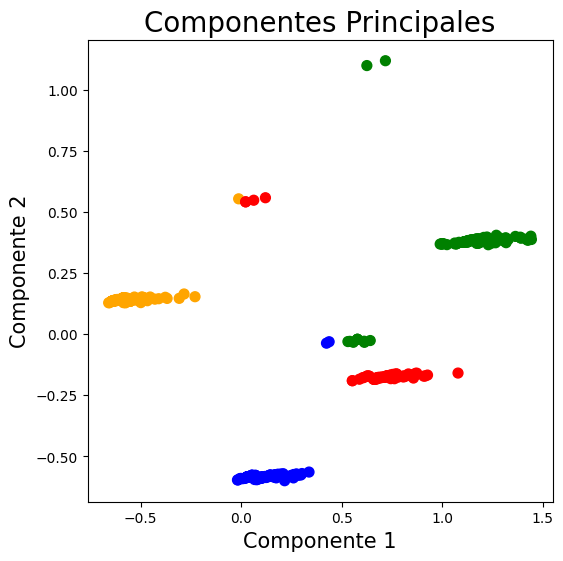

In [40]:
fig = plt.figure(figsize = (6,6))

ax =fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1", fontsize = 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes Principales",fontsize =20)

color_theme = np.array(["blue","green","orange","red"])
ax.scatter(x = pca_nombres_Conglomerado.Componente_1, y=pca_nombres_Conglomerado.Componente_2,
           c=color_theme[pca_nombres_Conglomerado.KMeans_Clusters],s=50)

plt.show()